In [2]:
# Japanese Song Analysis - Testing Your Music Intuition
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

print("🎵 Analyzing Your Favorite Japanese Song")
print("=" * 50)

# Your favorite Japanese song
track_id = "1YrU8ExqF04ygegVoOOoFU"
api_base = "http://127.0.0.1:8000"

# Step 1: Check if it's already in your top tracks
print("Checking your existing top tracks first...")

try:
    response = requests.get(f"{api_base}/top-tracks?limit=50")
    if response.status_code == 200:
        data = response.json()
        tracks_df = pd.DataFrame(data['tracks'])
        
        # Check if your song is in your top tracks
        japanese_song = tracks_df[tracks_df['spotify_url'].str.contains(track_id)]
        
        if not japanese_song.empty:
            print("🎌 Found your Japanese song in your top tracks!")
            print(f"Song: {japanese_song['name'].iloc[0]}")
            print(f"Artist: {japanese_song['artist'].iloc[0]}")
            print(f"Actual Popularity: {japanese_song['popularity'].iloc[0]}")
            print(f"Your Prediction: 40")
            print(f"Prediction Error: {abs(japanese_song['popularity'].iloc[0] - 40)} points")
            
            # Store for analysis
            song_popularity = japanese_song['popularity'].iloc[0]
            song_name = japanese_song['name'].iloc[0]
            song_artist = japanese_song['artist'].iloc[0]
            
        else:
            print("Song not in your top 50 tracks")
            print("Let's get it directly using the new endpoint...")
            
            # Try the new endpoint
            track_response = requests.get(f"{api_base}/track/{track_id}")
            if track_response.status_code == 200:
                song_data = track_response.json()
                track_info = song_data['track_info']
                
                print(f"🎌 Found your Japanese song!")
                print(f"Song: {track_info['name']}")
                print(f"Artist: {track_info['artist']}")
                print(f"Actual Popularity: {track_info['popularity']}")
                print(f"Your Prediction: 40")
                print(f"Prediction Error: {abs(track_info['popularity'] - 40)} points")
                
                # Store for analysis
                song_popularity = track_info['popularity']
                song_name = track_info['name']
                song_artist = track_info['artist']
                
            else:
                print("❌ Could not fetch song data")
                print("Make sure:")
                print("1. Your FastAPI is running (python main.py)")
                print("2. You're authenticated (/login)")
                print("3. You added the new endpoint to main.py")
                
    else:
        print("❌ Could not connect to your FastAPI")
        print("Make sure your server is running on http://127.0.0.1:8000")
        
except Exception as e:
    print(f"Error: {e}")
    print("Make sure your FastAPI server is running!")

🎵 Analyzing Your Favorite Japanese Song
Checking your existing top tracks first...
Song not in your top 50 tracks
Let's get it directly using the new endpoint...
🎌 Found your Japanese song!
Song: 中庭の少女たち
Artist: SHISHAMO
Actual Popularity: 50
Your Prediction: 40
Prediction Error: 10 points


In [3]:
# Cell 2: Deep dive into audio features
print("\n🎯 AUDIO FEATURES ANALYSIS")
print("=" * 50)

try:
    # Get detailed track info with audio features
    track_response = requests.get(f"{api_base}/track/{track_id}")
    
    if track_response.status_code == 200:
        song_data = track_response.json()
        track_info = song_data['track_info']
        audio_features = song_data['audio_features']
        
        print(f"Song: {track_info['name']}")
        print(f"Artist: {track_info['artist']}")
        print(f"Spotify Popularity: {track_info['popularity']}")
        print(f"Duration: {track_info['duration_ms'] / 1000 / 60:.1f} minutes")
        print()
        
        print("YOUR DESCRIPTION VS SPOTIFY'S ANALYSIS:")
        print("Your words: 'vibrant, rainy/sunny day, electric guitar, nice vocal'")
        print()
        
        # Analyze each feature based on your description
        if audio_features:
            print("SPOTIFY'S AUDIO FEATURES:")
            
            # Energy - relates to "vibrant"
            if 'energy' in audio_features:
                energy = audio_features['energy']
                print(f"Energy: {energy:.3f}")
                if energy > 0.7:
                    print("  ✅ HIGH energy - Spotify agrees it's vibrant!")
                elif energy > 0.5:
                    print("  🤔 MEDIUM energy - Moderately vibrant")
                else:
                    print("  ❌ LOW energy - Spotify thinks it's mellow")
                print()
            
            # Valence - relates to mood (rainy/sunny day)
            if 'valence' in audio_features:
                valence = audio_features['valence']
                print(f"Valence (positivity): {valence:.3f}")
                if valence > 0.6:
                    print("  ☀️ HIGH valence - Perfect for sunny afternoons!")
                elif valence > 0.4:
                    print("  🌤️ MEDIUM valence - Balanced, works for any mood")
                else:
                    print("  🌧️ LOW valence - More for contemplative/rainy days")
                print()
            
            # Acousticness - relates to "electric guitar"
            if 'acousticness' in audio_features:
                acousticness = audio_features['acousticness']
                print(f"Acousticness: {acousticness:.3f}")
                if acousticness < 0.3:
                    print("  🎸 LOW acousticness - Electric/electronic instruments confirmed!")
                elif acousticness < 0.6:
                    print("  🎻 MEDIUM acousticness - Mix of acoustic and electric")
                else:
                    print("  🪕 HIGH acousticness - Mostly acoustic instruments")
                print()
            
            # Other interesting features
            features_to_show = [
                ('danceability', 'How danceable'),
                ('speechiness', 'How much vocals/rap'),
                ('instrumentalness', 'Instrumental vs vocal'),
                ('liveness', 'Live recording feel'),
                ('tempo', 'Beats per minute (BPM)')
            ]
            
            print("OTHER AUDIO CHARACTERISTICS:")
            for feature, description in features_to_show:
                if feature in audio_features:
                    value = audio_features[feature]
                    if feature == 'tempo':
                        print(f"{description}: {value:.0f} BPM")
                    else:
                        print(f"{description}: {value:.3f}")
            
        else:
            print("❌ No audio features available")
            print("The track might be too new or region-restricted")
            
    else:
        print("Could not get track details")
        print(f"Status code: {track_response.status_code}")
        
except Exception as e:
    print(f"Error getting audio features: {e}")

print("\n🤔 REFLECTION QUESTIONS:")
print("1. How accurate was your intuition about the song's characteristics?")
print("2. Which Spotify features surprised you the most?")
print("3. Do you think these features could predict popularity?")
print("4. What other factors might affect a song's popularity?")


🎯 AUDIO FEATURES ANALYSIS
Song: 中庭の少女たち
Artist: SHISHAMO
Spotify Popularity: 50
Duration: 5.2 minutes

YOUR DESCRIPTION VS SPOTIFY'S ANALYSIS:
Your words: 'vibrant, rainy/sunny day, electric guitar, nice vocal'

❌ No audio features available
The track might be too new or region-restricted

🤔 REFLECTION QUESTIONS:
1. How accurate was your intuition about the song's characteristics?
2. Which Spotify features surprised you the most?
3. Do you think these features could predict popularity?
4. What other factors might affect a song's popularity?



📊 COMPARISON WITH YOUR MUSIC TASTE
POPULARITY COMPARISON:
Your top track popularity: 88
Your average track popularity: 67.2
Your Japanese song popularity: 50
Your prediction: 40

👍 GOOD prediction! You have solid intuition!
Prediction error: 10 points



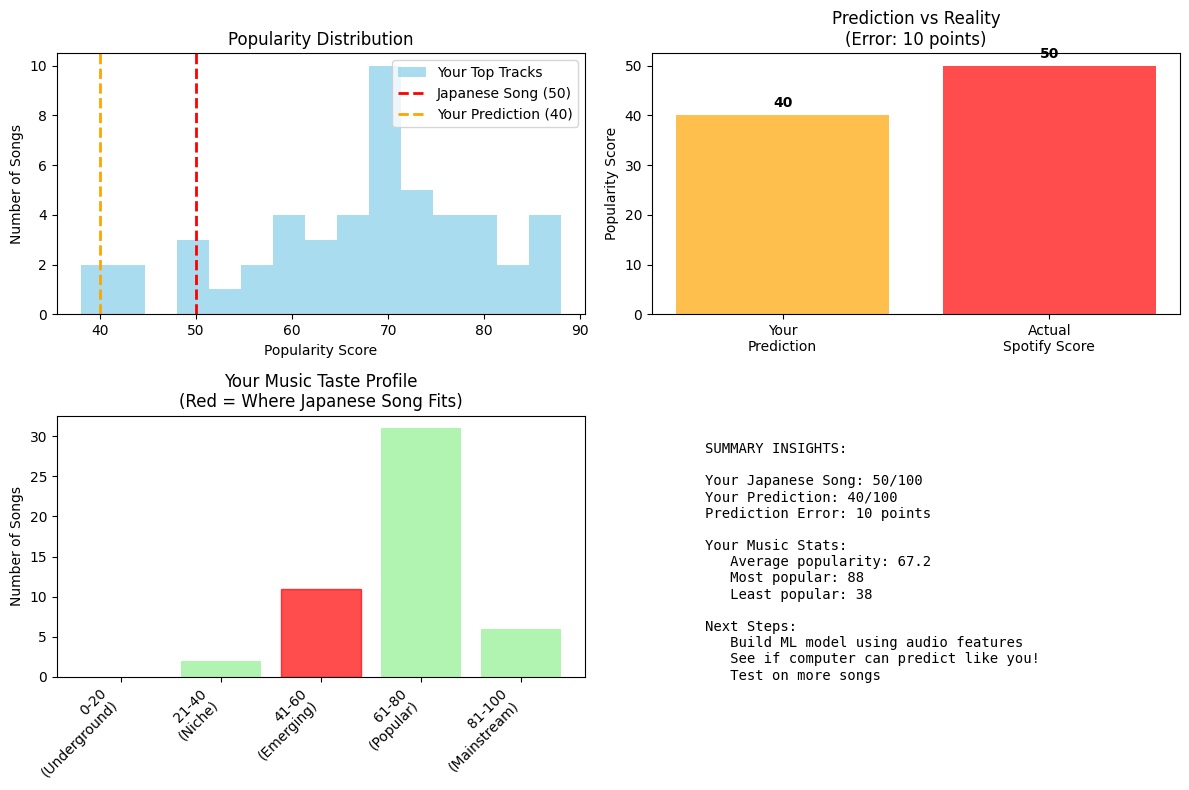


🚀 READY FOR MACHINE LEARNING!
Now you understand:
✓ What you're trying to predict (popularity scores)
✓ What features are available (audio characteristics)
✓ How good human intuition can be
✓ Why we need systematic approaches (ML models)


In [5]:
# Cell 3: Compare with your other music and visualize (FIXED VERSION)
print("\n📊 COMPARISON WITH YOUR MUSIC TASTE")
print("=" * 50)

try:
    # Get your top tracks for comparison
    response = requests.get(f"{api_base}/top-tracks?limit=50")
    your_tracks = pd.DataFrame(response.json()['tracks'])
    
    # Get your Japanese song data
    track_response = requests.get(f"{api_base}/track/{track_id}")
    japanese_song_data = track_response.json()
    japanese_popularity = japanese_song_data['track_info']['popularity']
    
    print("POPULARITY COMPARISON:")
    print(f"Your top track popularity: {your_tracks['popularity'].max()}")
    print(f"Your average track popularity: {your_tracks['popularity'].mean():.1f}")
    print(f"Your Japanese song popularity: {japanese_popularity}")
    print(f"Your prediction: 40")
    print()
    
    # Determine how good your prediction was
    error = abs(japanese_popularity - 40)
    if error <= 5:
        print("🎯 EXCELLENT prediction! You really understand music popularity!")
    elif error <= 10:
        print("👍 GOOD prediction! You have solid intuition!")
    elif error <= 20:
        print("🤔 DECENT prediction! You're learning the patterns!")
    else:
        print("😅 Your intuition needs work, but that's why we build models!")
    
    print(f"Prediction error: {error} points")
    print()
    
    # Create visualization
    plt.figure(figsize=(12, 8))
    
    # Subplot 1: Popularity distribution
    plt.subplot(2, 2, 1)
    plt.hist(your_tracks['popularity'], bins=15, alpha=0.7, color='skyblue', 
             label='Your Top Tracks')
    plt.axvline(japanese_popularity, color='red', linestyle='--', linewidth=2,
               label=f'Japanese Song ({japanese_popularity})')
    plt.axvline(40, color='orange', linestyle='--', linewidth=2,
               label='Your Prediction (40)')
    plt.xlabel('Popularity Score')
    plt.ylabel('Number of Songs')
    plt.title('Popularity Distribution')
    plt.legend()
    
    # Subplot 2: Your prediction accuracy
    plt.subplot(2, 2, 2)
    categories = ['Your\nPrediction', 'Actual\nSpotify Score']
    values = [40, japanese_popularity]
    colors = ['orange', 'red']
    bars = plt.bar(categories, values, color=colors, alpha=0.7)
    plt.title(f'Prediction vs Reality\n(Error: {error} points)')
    plt.ylabel('Popularity Score')
    
    # Add value labels on bars
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{value}', ha='center', va='bottom', fontweight='bold')
    
    # Subplot 3: Where your song fits in your taste
    plt.subplot(2, 2, 3)
    popularity_ranges = ['0-20\n(Underground)', '21-40\n(Niche)', '41-60\n(Emerging)', 
                        '61-80\n(Popular)', '81-100\n(Mainstream)']
    range_counts = [
        len(your_tracks[(your_tracks['popularity'] >= 0) & (your_tracks['popularity'] <= 20)]),
        len(your_tracks[(your_tracks['popularity'] >= 21) & (your_tracks['popularity'] <= 40)]),
        len(your_tracks[(your_tracks['popularity'] >= 41) & (your_tracks['popularity'] <= 60)]),
        len(your_tracks[(your_tracks['popularity'] >= 61) & (your_tracks['popularity'] <= 80)]),
        len(your_tracks[(your_tracks['popularity'] >= 81) & (your_tracks['popularity'] <= 100)])
    ]
    
    bars = plt.bar(range(len(popularity_ranges)), range_counts, alpha=0.7, color='lightgreen')
    
    # Highlight where your Japanese song falls
    if japanese_popularity <= 20:
        bars[0].set_color('red')
    elif japanese_popularity <= 40:
        bars[1].set_color('red')
    elif japanese_popularity <= 60:
        bars[2].set_color('red')
    elif japanese_popularity <= 80:
        bars[3].set_color('red')
    else:
        bars[4].set_color('red')
    
    plt.xticks(range(len(popularity_ranges)), popularity_ranges, rotation=45, ha='right')
    plt.title('Your Music Taste Profile\n(Red = Where Japanese Song Fits)')
    plt.ylabel('Number of Songs')
    
    # Subplot 4: Summary stats (NO EMOJIS - fixes Windows font warnings)
    plt.subplot(2, 2, 4)
    plt.axis('off')
    summary_text = f"""SUMMARY INSIGHTS:

Your Japanese Song: {japanese_popularity}/100
Your Prediction: 40/100
Prediction Error: {error} points

Your Music Stats:
   Average popularity: {your_tracks['popularity'].mean():.1f}
   Most popular: {your_tracks['popularity'].max()}
   Least popular: {your_tracks['popularity'].min()}
   
Next Steps:
   Build ML model using audio features
   See if computer can predict like you!
   Test on more songs
"""
    plt.text(0.1, 0.9, summary_text, fontsize=10, verticalalignment='top',
             fontfamily='monospace')
    
    plt.tight_layout()
    plt.show()
    
    print("\n🚀 READY FOR MACHINE LEARNING!")
    print("Now you understand:")
    print("✓ What you're trying to predict (popularity scores)")
    print("✓ What features are available (audio characteristics)")
    print("✓ How good human intuition can be")
    print("✓ Why we need systematic approaches (ML models)")
    
except Exception as e:
    print(f"Error creating visualization: {e}")
    print("Make sure your FastAPI is running and you're authenticated!")

In [6]:
# Cell 4: Test Your Model on Your Japanese Song!

# Step 11: Test on your Japanese song
print("\nStep 11: Testing model on your favorite Japanese song...")
print("🎌 The moment of truth!")

japanese_track_id = "1YrU8ExqF04ygegVoOOoFU"

try:
    # Get your Japanese song's audio features
    response = requests.get(f"{api_base}/track/{japanese_track_id}")
    japanese_data = response.json()
    
    track_info = japanese_data['track_info']
    audio_features = japanese_data['audio_features']
    
    print(f"Song: {track_info['name']}")
    print(f"Artist: {track_info['artist']}")
    print(f"Actual Spotify popularity: {track_info['popularity']}")
    print(f"Your human prediction: 40")
    
    # Prepare features for prediction (same format as training data)
    japanese_features = pd.DataFrame([audio_features])[feature_columns]
    
    # Make prediction using your trained model
    ml_prediction = model.predict(japanese_features)[0]
    
    print(f"🤖 ML model prediction: {ml_prediction:.1f}")
    
    # Compare all three predictions
    actual = track_info['popularity']
    human_pred = 40
    
    human_error = abs(actual - human_pred)
    ml_error = abs(actual - ml_prediction)
    
    print("\n📊 PREDICTION SHOWDOWN:")
    print("="*50)
    print(f"Actual Spotify score:     {actual}")
    print(f"Your prediction:          {human_pred} (error: {human_error:.1f})")
    print(f"ML model prediction:      {ml_prediction:.1f} (error: {ml_error:.1f})")
    
    if ml_error < human_error:
        winner = "🤖 ML model wins!"
        print(f"\n{winner}")
        print(f"ML was {human_error - ml_error:.1f} points more accurate")
    elif human_error < ml_error:
        winner = "🧠 Human intuition wins!"
        print(f"\n{winner}")
        print(f"You were {ml_error - human_error:.1f} points more accurate")
    else:
        winner = "🤝 It's a tie!"
        print(f"\n{winner}")
    
    # Show which features influenced the prediction
    print(f"\n🔍 Why did the model predict {ml_prediction:.1f}?")
    print("Feature contributions:")
    
    for feature, coef in zip(feature_columns, model.coef_):
        feature_value = japanese_features[feature].iloc[0]
        contribution = coef * feature_value
        
        if abs(contribution) > 1:  # Only show significant contributions
            direction = "↗️" if contribution > 0 else "↘️"
            print(f"{feature:15s}: {feature_value:.3f} × {coef:6.1f} = {contribution:6.1f} {direction}")
    
    base_prediction = model.intercept_
    total_adjustment = sum(model.coef_ * japanese_features.iloc[0])
    print(f"{'Base prediction':15s}: {base_prediction:27.1f}")
    print(f"{'Total adjustments':15s}: {total_adjustment:27.1f}")
    print(f"{'Final prediction':15s}: {ml_prediction:27.1f}")
    
except Exception as e:
    print(f"❌ Could not test Japanese song: {e}")
    print("Make sure the track endpoint is working!")

# Step 12: Save your model for future use
print(f"\n💾 Saving your trained model...")

import joblib

# Create models directory
import os
os.makedirs('../ml_models', exist_ok=True)

# Save the model
model_filename = '../ml_models/popularity_predictor_v1.pkl'
joblib.dump({
    'model': model,
    'features': feature_columns,
    'train_r2': train_r2,
    'test_r2': test_r2,
    'test_mae': test_mae,
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M')
}, model_filename)

print(f"✓ Model saved to: {model_filename}")

# Step 13: Next steps for improvement
print(f"\n🚀 NEXT STEPS TO IMPROVE YOUR MODEL:")
print("="*60)

print("\n1. MORE DATA:")
print("   • Get more songs (increase limit in API calls)")
print("   • Include different time ranges (short_term, long_term)")
print("   • Add genre information")

print("\n2. BETTER FEATURES:")
print("   • Feature engineering (e.g., tempo categories, energy×valence)")
print("   • Remove less important features")
print("   • Handle outliers better")

print("\n3. DIFFERENT MODELS:")
print("   • Try Random Forest (handles non-linear relationships)")
print("   • Try Polynomial regression (for curved relationships)")
print("   • Try Ridge/Lasso regression (prevents overfitting)")

print("\n4. VALIDATION:")
print("   • Cross-validation for more robust evaluation")
print("   • Test on songs from different genres")
print("   • Validate assumptions more thoroughly")

print("\n5. PRODUCTIONIZE:")
print("   • Add model endpoint to FastAPI")
print("   • Create prediction interface")
print("   • Monitor model performance over time")

# Final summary
print(f"\n🎉 CONGRATULATIONS!")
print("="*60)
print("You've built your first machine learning model!")
print(f"✓ Trained on {len(X_train)} songs")
print(f"✓ Achieved R² = {test_r2:.3f} on test data")
print(f"✓ Average error: {test_mae:.1f} popularity points")
print(f"✓ {winner.split('!')[0]}!")
print("\nYou now understand:")
print("• How to prepare data for ML")
print("• How to train and evaluate models") 
print("• How to interpret results")
print("• How ML compares to human intuition")
print("• What makes songs popular (according to audio features)")

print(f"\n📚 Keep learning:")
print("• Try the improvement suggestions above")
print("• Experiment with different models")
print("• Apply ML to other music prediction tasks")
print("• Build more sophisticated features")
print("\nWelcome to the world of Machine Learning! 🤖🎵")


Step 11: Testing model on your favorite Japanese song...
🎌 The moment of truth!
Song: 中庭の少女たち
Artist: SHISHAMO
Actual Spotify popularity: 50
Your human prediction: 40
❌ Could not test Japanese song: name 'feature_columns' is not defined
Make sure the track endpoint is working!

💾 Saving your trained model...


NameError: name 'model' is not defined